In [1]:
import pandas as pd
import numpy as np

In [2]:
metrics_df = pd.read_csv('../data/processed/run_plays_reduced.csv')

## Tackle Type
Remove forcedFumbles because the tackler (by definition) does not complete a tackle on the ball carrier. This leaves ambiguity about the ability for the tackler to bring the ball carrier down.

Assists are mapped to tackles.
- Another option to consider: removing all plays where there is an assist. This could make tackles more clear when only one player is amkeing or missing a tackle

In [3]:
metrics_df['event'].replace('assist', 'tackle', inplace=True)

In [4]:
metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)

## Time to Contact
One tackler had a speed of 0 at the frame of interest. This causes the time to contact to be infinite. To avoid errors in plotting, this infinite value is replaced with 1000.

In [5]:
metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)

In [6]:
# must be within field of play, and less than 5 seconds from contact point at current speed
metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                              (metrics_df['x_contact'] > 0) &
                              (abs(metrics_df['diff_time_to_contact']) < 5)
                             )

## Momentum
The momentum_x_diff is calculated by subtracting the tackler x momentum from the ball carrier x momentum. But the tackler "should" be moving in the opposite direction as the ball carrier, so the tackler momentum "should" be negative. To acheive the correct signs at the end of the calculation the momentums in the x direction should be added.

In [7]:
metrics_df['momentum_x_add'] = metrics_df['momentum_x_ball_carrier'] + metrics_df['momentum_x']

# Plotting

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

In [ ]:
def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

In [ ]:
def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

In [ ]:
hist(metrics_df, "momentum_x_add")

In [ ]:
violin(metrics_df, "momentum_x_add")

In [ ]:
box(metrics_df, "momentum_x_add")

In [ ]:
box(metrics_df, "momentum_x_diff")

In [ ]:
metrics_df.columns

In [ ]:
single_player_metric_columns = [
       'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase', 'x_ball_carrier',
       'y_ball_carrier', 's_ball_carrier', 'a_ball_carrier',
       'dis_ball_carrier', 'o_ball_carrier', 'dir_ball_carrier',
       'force_ball_carrier', 'force_x_ball_carrier',
       'force_y_ball_carrier', 'momentum_ball_carrier',
       'momentum_x_ball_carrier', 'momentum_y_ball_carrier',
       'contact_angle_cos', 'contact_angle_force']
player_diff_metric_columns = [
       'tackler_to_ball_carrier_dist', 'force_diff', 'force_x_diff',
       'force_y_diff', 'momentum_diff', 'momentum_x_diff', 'momentum_y_diff',
       'x_contact', 'y_contact', 'tackler_to_contact_dist',
       'ball_carrier_to_contact_dist', 'tackler_time_to_contact',
       'ball_carrier_time_to_contact', 'diff_time_to_contact', 'contact_angle',
       'contact_angle_force_diff']

In [ ]:
for metric in single_player_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

In [ ]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(metrics_df, metric)
    violin(metrics_df, metric)
    box(metrics_df, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

## Contact Distance
Many of the plots surrounding the distance between the players and the contact point are difficult to see because the range is so large. This section explores options to restrict the results to a range when the players are "likely" to make contact.
- Need to determine how removing examples impact the ability to compare groups

In [ ]:
# Clip Contact Point
metrics_df[metrics_df['x_contact'] < metrics_df['x'] -1][['x_contact', 'x']]

In [ ]:
len(metrics_df)

In [ ]:
metrics_df[metrics_df['x_contact'] > 110]['x_contact']

In [ ]:
metrics_df[metrics_df['x_contact'].isna()]['x_contact']

In [ ]:
metrics_df[metrics_df['x_contact'] > metrics_df['x'] +5][['x_contact', 'x', 'diff_time_to_contact']]

In [ ]:
metrics_df['make_contact'].value_counts()

In [ ]:
metrics_df[(metrics_df['dir'] < 180) & (metrics_df['x_contact'] < metrics_df['x'] -1)]['event'].value_counts()

In [ ]:
metrics_df[~metrics_df['make_contact']]['event'].value_counts()

In [ ]:
metrics_df[metrics_df['make_contact']]['event'].value_counts()

In [ ]:
18/(818+15)

In [ ]:
131/(7735+131)

In [ ]:
385/(385+7500)

In [ ]:
df_contact = metrics_df[metrics_df['make_contact']]

In [ ]:
metric = "diff_time_to_contact"
hist(df_contact, metric)
violin(df_contact, metric)
box(df_contact, metric)

In [ ]:
for metric in player_diff_metric_columns:
    print(metric)
    hist(df_contact, metric)
    violin(df_contact, metric)
    box(df_contact, metric)
    print("----------------------------------------------------")
    print("----------------------------------------------------")

# More Plotting

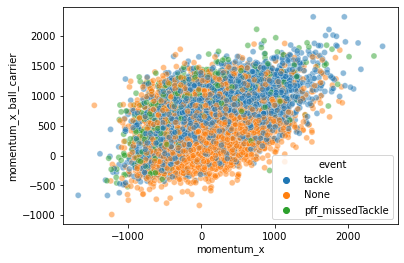

In [12]:
sns.scatterplot(metrics_df, x="momentum_x", y="momentum_x_ball_carrier", hue="event", alpha=0.5)

In [29]:
def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

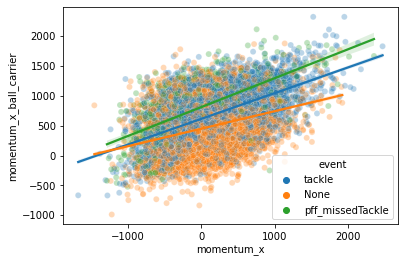

In [30]:
regression(metrics_df, "momentum_x")

In [31]:
scatter_metric_columns = ['x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'force', 'force_x', 'force_y', 'momentum', 'momentum_x',
       'momentum_y', 'in_phase']

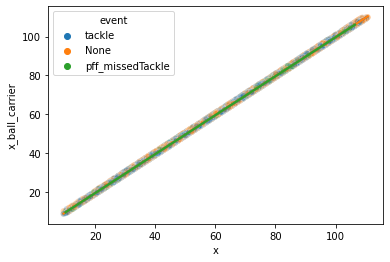

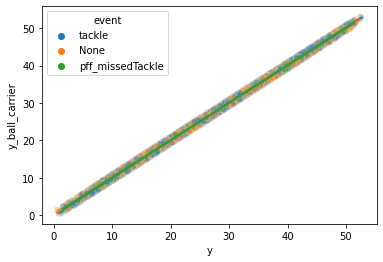

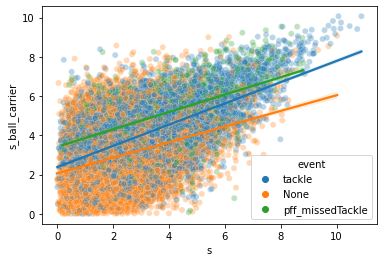

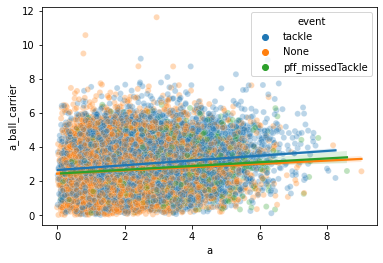

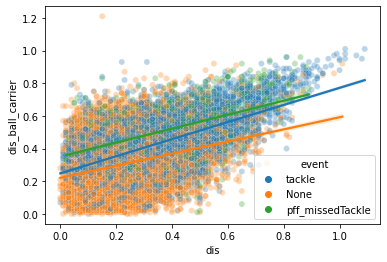

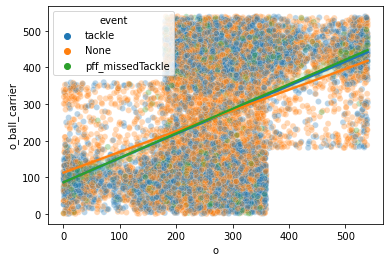

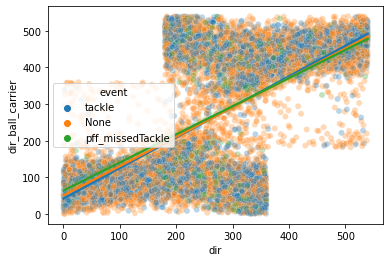

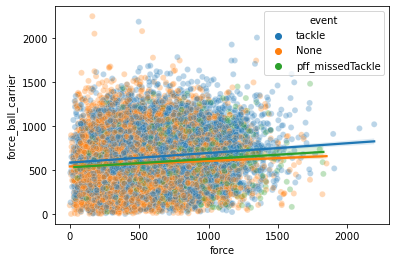

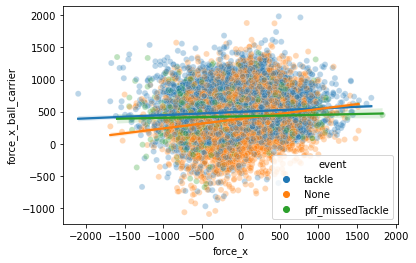

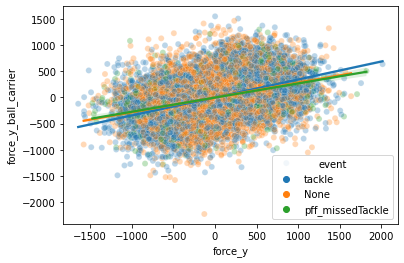

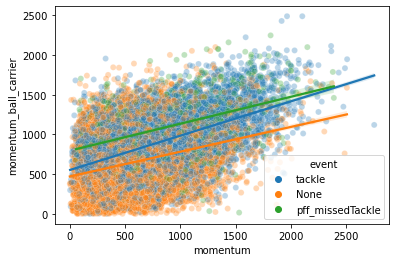

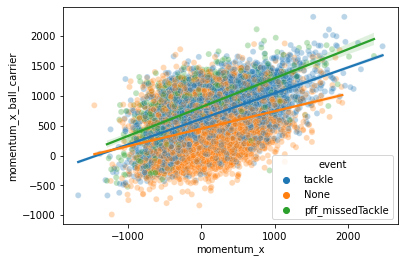

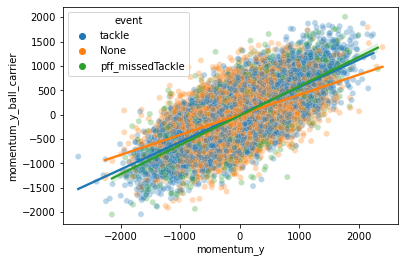

ValueError: Could not interpret value `in_phase_ball_carrier` for parameter `y`

In [32]:
for metric_column in scatter_metric_columns:
    regression(metrics_df, metric_column)